# Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
import os
import platform

In [3]:
#Function of conversion of list of list to simple list 
def toList(arr):
    return [j for i in arr for j in i]

In [4]:
#
path_to_shared_library = "target/debug/librust_lib.dylib"
path_to_shared_library_windows = "target\\debug\\rust_lib.dll"

if(platform.system()=='Windows'):
    my_lib = cdll.LoadLibrary(path_to_shared_library_windows)
else : 
    my_lib = cdll.LoadLibrary(path_to_shared_library)


# Cas de tests, rendu 2

## Classification

### Linear Simple :
        SVM : OK
        SVM trick   : OK

[ 2.20000336 -0.40000037 -0.80000088]


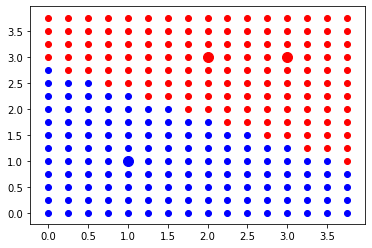

<Figure size 432x288 with 0 Axes>

In [4]:
#Dataset
X= np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y= np.array([
      1,
      -1,
      -1
])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = Y.tolist()
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs )
inputs_dim = inputs_len//expected_len



#Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.train_model_SVM.argtypes = [inputs_type,outputs_type,c_int,c_int,c_int]
my_lib.train_model_SVM.restype = POINTER(c_double)

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

#Creation of model
native_arr = my_lib.train_model_SVM(inputs_native,outputs_native,inputs_len,expected_len,inputs_dim)
model_len = inputs_dim+1


#Declaration of argtypes and restypes for the function predict_SVM
native_type = type(native_arr)
coordonate_type = c_double*model_len
my_lib.predict_SVM.argtypes = [native_type,coordonate_type,c_int]
my_lib.predict_SVM.restype = c_float



#Trainning
r = np.arange(0.0, 4.0, 0.25)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []


for i in r:
    for j in r:
        coord = coordonate_type(*[1.0,i,j])
        res=my_lib.predict_SVM(native_arr,coord,model_len)

        if  res> 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_red.append(i)
            points_x2_red.append(j)

np_arr = np.ctypeslib.as_array(native_arr, (model_len,))
print(np_arr)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter([X[p][0] for p in range(len(Y)) if Y[p]>0], [X[p][1] for p in range(len(Y)) if Y[p]>0], c='blue', s=100)
plt.scatter([X[p][0] for p in range(len(Y)) if Y[p]<0], [X[p][1] for p in range(len(Y)) if Y[p]<0], c='red', s=100)

plt.show()
plt.clf()


#Free memory
my_lib.destroy_array_double.argtypes = [POINTER(c_double), c_int]
my_lib.destroy_array_double.restype = None
my_lib.destroy_array_double(native_arr, model_len)


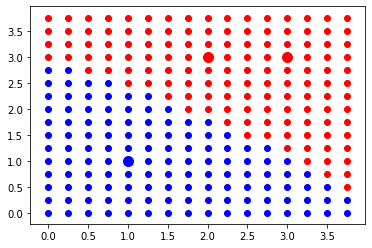

<Figure size 432x288 with 0 Axes>

In [5]:
#Dataset
X= np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y= np.array([
      1,
      -1,
      -1
])

# Convert array to list
dataset_inputs = toList(X)
dataset_expected_outputs = Y
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs)
inputs_dim = inputs_len // expected_len


# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len,inputs_dim)


native_type = type(native_arr)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type,native_type,c_int,c_int]
my_lib.predict_SVM_trick.restype = c_float


# Trainning
r = np.arange(0.0, 4.0, 0.25)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord,native_arr,expected_len,inputs_dim)

        if res > 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] > 0], [X[p][1] for p in range(len(Y)) if Y[p] > 0], c='blue',
            s=100)
plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] < 0], [X[p][1] for p in range(len(Y)) if Y[p] < 0], c='red',
            s=100)

plt.show()
plt.clf()

#Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)



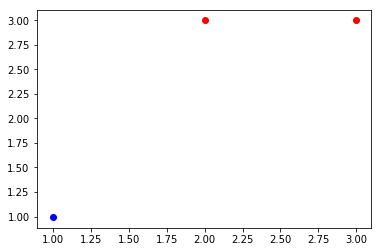

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

### Linear Multiple :
        SVM: OK
        svm TRICK   : OK

### SVM 

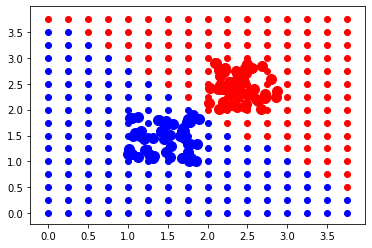

<Figure size 432x288 with 0 Axes>

In [6]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])

#Convert array to list
dataset_inputs  = toList(X)
dataset_expected_outputs  = toList(Y)
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs )
inputs_dim = inputs_len//expected_len



#Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.train_model_SVM.argtypes = [inputs_type,outputs_type,c_int,c_int,c_int]
my_lib.train_model_SVM.restype = POINTER(c_double)

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

#Creation of model
native_arr = my_lib.train_model_SVM(inputs_native,outputs_native,inputs_len,expected_len,inputs_dim)
model_len = inputs_dim+1


#Declaration of argtypes and restypes for the function predict_SVM
native_type = type(native_arr)
coordonate_type = c_double*model_len
my_lib.predict_SVM.argtypes = [native_type,coordonate_type,c_int]
my_lib.predict_SVM.restype = c_float



#Trainning
r = np.arange(0.0, 4.0, 0.25)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []


for i in r:
    for j in r:
        coord = coordonate_type(*[1.0,i,j])
        res=my_lib.predict_SVM(native_arr,coord,model_len)

        if  res> 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_red.append(i)
            points_x2_red.append(j)



plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter([X[p][0] for p in range(len(Y)) if Y[p]>0], [X[p][1] for p in range(len(Y)) if Y[p]>0], c='blue', s=100)
plt.scatter([X[p][0] for p in range(len(Y)) if Y[p]<0], [X[p][1] for p in range(len(Y)) if Y[p]<0], c='red', s=100)

plt.show()
plt.clf()


#Free memory
my_lib.destroy_array_double.argtypes = [POINTER(c_double), c_int]
my_lib.destroy_array_double.restype = None
my_lib.destroy_array_double(native_arr, model_len)


### SVM Trick

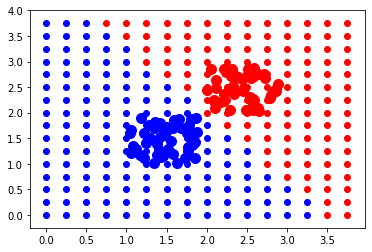

<Figure size 432x288 with 0 Axes>

In [7]:

X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])


# Convert array to list
dataset_inputs = toList(X)
dataset_expected_outputs = Y
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs)
inputs_dim = inputs_len // expected_len


# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len,inputs_dim)


native_type = type(native_arr)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type,native_type,c_int,c_int]
my_lib.predict_SVM_trick.restype = c_float


# Trainning
r = np.arange(0.0, 4.0, 0.25)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord,native_arr,expected_len,inputs_dim)

        if res > 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] > 0], [X[p][1] for p in range(len(Y)) if Y[p] > 0], c='blue',
            s=100)
plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] < 0], [X[p][1] for p in range(len(Y)) if Y[p] < 0], c='red',
            s=100)

plt.show()
plt.clf()

#Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)

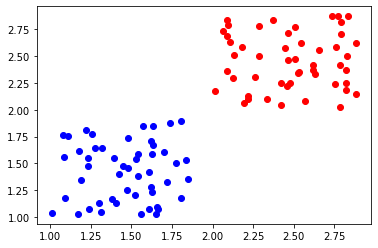

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()



### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

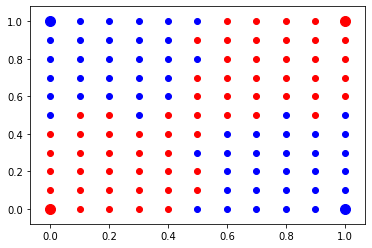

<Figure size 432x288 with 0 Axes>

In [5]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

# Convert array to list
dataset_inputs = toList(X)
dataset_expected_outputs = Y
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs)
inputs_dim = inputs_len // expected_len


# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len,inputs_dim)


native_type = type(native_arr)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type,native_type,c_int,c_int]
my_lib.predict_SVM_trick.restype = c_float


# Trainning
r = np.arange(0.0, 1.10, 0.10)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord,native_arr,expected_len,inputs_dim)

        if res > 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] > 0], [X[p][1] for p in range(len(Y)) if Y[p] > 0], c='blue',
            s=100)
plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] < 0], [X[p][1] for p in range(len(Y)) if Y[p] < 0], c='red',
            s=100)

plt.show()
plt.clf()

#Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)


In [10]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

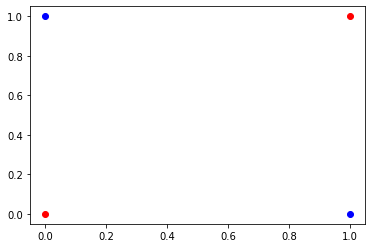

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

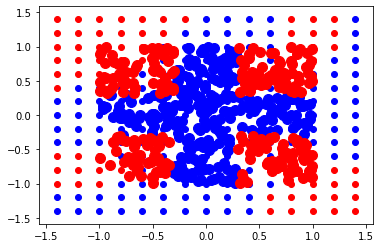

<Figure size 432x288 with 0 Axes>

In [12]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

# Convert array to list
dataset_inputs = toList(X)
dataset_expected_outputs = Y
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs)
inputs_dim = inputs_len // expected_len


# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len,inputs_dim)


native_type = type(native_arr)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type,native_type,c_int,c_int]
my_lib.predict_SVM_trick.restype = c_float


# Trainning
r = np.arange(-1.4, 1.5, 0.20)

points_x1_blue = []
points_x2_blue = []

points_x1_red = []
points_x2_red = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord,native_arr,expected_len,inputs_dim)

        if res > 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_red.append(i)
            points_x2_red.append(j)

plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_red, points_x2_red, c='red')

plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] > 0], [X[p][1] for p in range(len(Y)) if Y[p] > 0], c='blue',
            s=100)
plt.scatter([X[p][0] for p in range(len(Y)) if Y[p] < 0], [X[p][1] for p in range(len(Y)) if Y[p] < 0], c='red',
            s=100)

plt.show()
plt.clf()

#Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)

In [ ]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

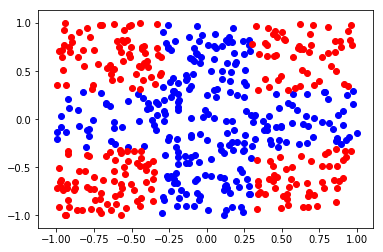

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Multi Linear 3 classes :
        SVM : OK
        SVM trick      : OK

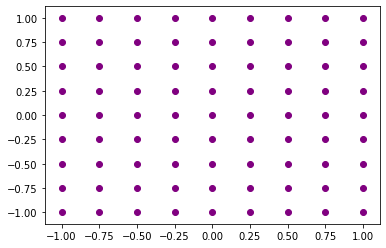

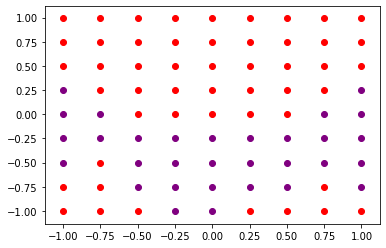

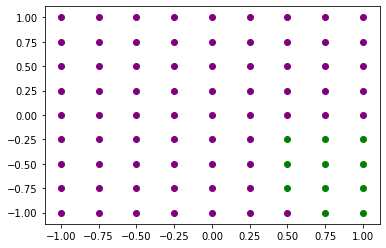

<Figure size 432x288 with 0 Axes>

In [5]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else
              [0, 0, 0] for p in X])

# Convert array to list
dataset_inputs = toList(X)
dataset_expected_outputs = [1 if i == 1 else -1 for i in Y[:, 0]]
dataset_expected_outputs2 = [1 if i == 1 else -1 for i in Y[:, 1]]
dataset_expected_outputs3 = [1 if i == 1 else -1 for i in Y[:, 2]]
inputs_len = len(dataset_inputs)
expected_len = len(dataset_expected_outputs)
inputs_dim = inputs_len // expected_len

# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len, inputs_dim)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type, native_type, c_int, c_int]
my_lib.predict_SVM_trick.restype = c_float

# Trainning
r = np.arange(-1.0, 1.25, 0.25)

points_x1_blue = []
points_x2_blue = []

points_x1_no_blue = []
points_x2_no_blue = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord, native_arr, expected_len, inputs_dim)

        if res > 0.0:
            points_x1_blue.append(i)
            points_x2_blue.append(j)
        else:
            points_x1_no_blue.append(i)
            points_x2_no_blue.append(j)


plt.scatter(points_x1_blue, points_x2_blue, c='blue')
plt.scatter(points_x1_no_blue, points_x2_no_blue, c='purple')

#plt.scatter([X[p][0] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] > 0], [X[p][1] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] > 0], c='blue',
#            s=100)
#plt.scatter([X[p][0] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] < 0], [X[p][1] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] < 0], c='purple',
#           s=100)

plt.show()
plt.clf()

# Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)


#####################################################
#####################################################

# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs2)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len, inputs_dim)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type, native_type, c_int, c_int]
my_lib.predict_SVM_trick.restype = c_float

# Trainning
r = np.arange(-1.0, 1.25, 0.25)

points_x1_red = []
points_x2_red = []

points_x1_no_red = []
points_x2_no_red = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord, native_arr, expected_len, inputs_dim)

        if res > 0.0:
            points_x1_red.append(i)
            points_x2_red.append(j)
        else:
            points_x1_no_red.append(i)
            points_x2_no_red.append(j)


plt.scatter(points_x1_red, points_x2_red, c='red')
plt.scatter(points_x1_no_red, points_x2_no_red, c='purple')

#plt.scatter([X[p][0] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] > 0], [X[p][1] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] > 0], c='blue',
#            s=100)
#plt.scatter([X[p][0] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] < 0], [X[p][1] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] < 0], c='purple',
#           s=100)

plt.show()
plt.clf()

# Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)

#####################################################
#####################################################

# Declaration of argtypes and restypes for the function create_model_SVM
inputs_type = c_float * inputs_len
outputs_type = c_float * expected_len
my_lib.creat_model_SVM_trick.argtypes = [inputs_type, outputs_type, c_int, c_int, c_int]
my_lib.creat_model_SVM_trick.restype = c_void_p

inputs_native = inputs_type(*dataset_inputs)
outputs_native = outputs_type(*dataset_expected_outputs3)

# Creation of model
native_arr = my_lib.creat_model_SVM_trick(inputs_native, outputs_native, inputs_len, expected_len, inputs_dim)
native_type = c_void_p
coordonate_type = c_float * inputs_dim
my_lib.predict_SVM_trick.argtypes = [coordonate_type, native_type, c_int, c_int]
my_lib.predict_SVM_trick.restype = c_float

# Trainning
r = np.arange(-1.0, 1.25, 0.25)

points_x1_green = []
points_x2_green = []

points_x1_no_green = []
points_x2_no_green = []

for i in r:
    for j in r:
        coord = coordonate_type(*[i, j])
        res = my_lib.predict_SVM_trick(coord, native_arr, expected_len, inputs_dim)

        if res > 0.0:
            points_x1_green.append(i)
            points_x2_green.append(j)
        else:
            points_x1_no_green.append(i)
            points_x2_no_green.append(j)


plt.scatter(points_x1_green, points_x2_green, c='green')
plt.scatter(points_x1_no_green, points_x2_no_green, c='purple')

#plt.scatter([X[p][0] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] > 0], [X[p][1] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] > 0], c='blue',
#            s=100)
#plt.scatter([X[p][0] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] < 0], [X[p][1] for p in range(len(dataset_expected_outputs)) if dataset_expected_outputs[p] < 0], c='purple',
#           s=100)

plt.show()
plt.clf()

# Free memory
my_lib.destroy_model_SVM.argtypes = [c_void_p]
my_lib.destroy_model_SVM.restype = None
my_lib.destroy_model_SVM(native_arr)

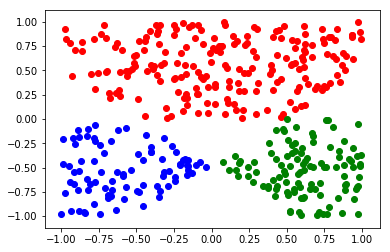

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [ ]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

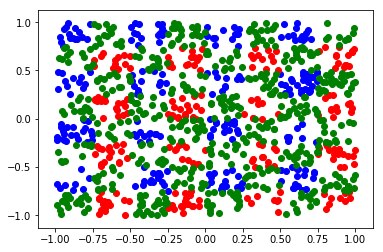

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()